In [1]:

import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, KNNImputer
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:

data = {
    'Age': [25, 30, np.nan, 40, np.nan, 35],
    'Salary': [50000, 54000, 58000, np.nan, 60000, np.nan],
    'Department': ['HR', 'Finance', np.nan, 'IT', 'HR', 'Finance']
}
df = pd.DataFrame(data)
print("Original Dataset:")
display(df)


Original Dataset:


,Age,Salary,Department
0,25.0,50000.0,HR
1,30.0,54000.0,Finance
2,NaN,58000.0,NaN
3,40.0,NaN,IT
4,NaN,60000.0,HR
5,35.0,NaN,Finance


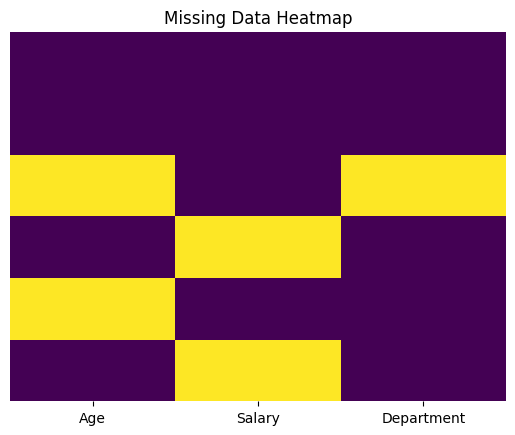

In [ ]:

sns.heatmap(df.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title("Missing Data Heatmap")
plt.show()


In [ ]:

df_dropped = df.dropna()
print("After Dropping Missing Values (Rows):")
display(df_dropped)


After Dropping Missing Values (Rows):


,Age,Salary,Department
0,25.0,50000.0,HR
1,30.0,54000.0,Finance


# **`SimpleImputer`**

### **Key Features of `SimpleImputer`:**

1. **Filling Missing Values**:
   - It allows you to replace missing values (e.g., `NaN`) in a dataset with specific strategies like mean, median, most frequent value, or a constant.

2. **Customizable**:
   - You can specify the imputation strategy based on the nature of the data and the problem requirements.

3. **Applicable to Numerical and Categorical Data**:
   - Depending on the strategy and data type, you can use `SimpleImputer` for both numerical and categorical features.

---



### **Initialization Parameters:**

1. **`missing_values`**:
   - The placeholder for missing values. By default, it is `np.nan`, but you can specify other placeholders if necessary.

2. **`strategy`**:
   - Specifies the imputation strategy.
     - `"mean"`: Replaces missing values with the mean of the column (default, works for numerical data).
     - `"median"`: Replaces missing values with the median of the column (works for numerical data).
     - `"most_frequent"`: Uses the most frequently occurring value (mode) in the column (works for both numerical and categorical data).
     - `"constant"`: Fills missing values with a constant value specified by the `fill_value` parameter.

3. **`fill_value`**:
   - Used only when `strategy="constant"`. Specifies the value to replace missing values. Defaults to `0` for numerical data and `"missing_value"` for strings or object data.

4. **`add_indicator`**:
   - If `True`, appends an additional binary indicator column to the output to mark the locations of missing values (useful for tracking and analysis).

---

### **How It Works:**

1. **Fit**:
   - Calculates the replacement value for missing data based on the specified strategy and the provided dataset.

2. **Transform**:
   - Replaces missing values in the dataset with the calculated value.

3. **Fit-Transform**:
   - Combines the above two steps in a single call.

---

In [ ]:
df['Age'].mean(), df['Salary'].median()

(32.5, 56000.0)

In [ ]:

mean_imputer = SimpleImputer(strategy='mean')
median_imputer = SimpleImputer(strategy='median')

df['Age_Mean_Imputed'] = mean_imputer.fit_transform(df[['Age']]).ravel()
df['Salary_Median_Imputed'] = median_imputer.fit_transform(df[['Salary']]).ravel()

print("After Mean and Median Imputation:")
display(df)


After Mean and Median Imputation:


,Age,Salary,Department,Age_Mean_Imputed,Salary_Median_Imputed
0,25.0,50000.0,HR,25.0,50000.0
1,30.0,54000.0,Finance,30.0,54000.0
2,NaN,58000.0,NaN,32.5,58000.0
3,40.0,NaN,IT,40.0,56000.0
4,NaN,60000.0,HR,32.5,60000.0
5,35.0,NaN,Finance,35.0,56000.0


In [ ]:
df['Age'].mean()

32.5

In [ ]:

mode_imputer = SimpleImputer(strategy='most_frequent')
df['Department_Mode_Imputed'] = mode_imputer.fit_transform(df[['Department']]).ravel()

print("After Mode Imputation for Categorical Data:")
display(df)


After Mode Imputation for Categorical Data:


,Age,Salary,Department,Age_Mean_Imputed,Salary_Median_Imputed,Department_Mode_Imputed
0,25.0,50000.0,HR,25.0,50000.0,HR
1,30.0,54000.0,Finance,30.0,54000.0,Finance
2,NaN,58000.0,NaN,32.5,58000.0,Finance
3,40.0,NaN,IT,40.0,56000.0,IT
4,NaN,60000.0,HR,32.5,60000.0,HR
5,35.0,NaN,Finance,35.0,56000.0,Finance


#**`KNN IMPUTER`**

The `KNNImputer` is a class from the `sklearn.impute` module in Scikit-learn that imputes missing values using the k-nearest neighbors (KNN) algorithm. It is a more sophisticated imputation method compared to `SimpleImputer` because it considers the relationships between features to predict the missing values.

---

### **How `KNNImputer` Works:**
1. **Identify Neighbors**:
   - For each missing value in a row, the algorithm identifies the `n_neighbors` nearest rows based on the values of other (non-missing) features.
   - Distance is typically computed using the Euclidean metric, but it can be adjusted.

2. **Predict Missing Values**:
   - The missing value is imputed by calculating the weighted average (or simple mean, depending on parameters) of the corresponding feature values in the nearest neighbors.

3. **Handles Correlations**:
   - By leveraging neighboring data points, it captures the relationships between features and can provide more accurate imputations, especially when features are correlated.

---

In [ ]:

knn_imputer = KNNImputer(n_neighbors=6)
df_knn_imputed = pd.DataFrame(knn_imputer.fit_transform(df[['Age', 'Salary']]), columns=['Age_KNN', 'Salary_KNN'])

print("After KNN Imputation:")
display(df_knn_imputed)
display(df)


After KNN Imputation:


,Age_KNN,Salary_KNN
0,25.0,50000.0
1,30.0,54000.0
2,27.5,58000.0
3,40.0,52000.0
4,27.5,60000.0
5,35.0,52000.0


,Age,Salary,Department,Age_Mean_Imputed,Salary_Median_Imputed
0,25.0,50000.0,HR,25.0,50000.0
1,30.0,54000.0,Finance,30.0,54000.0
2,NaN,58000.0,NaN,32.5,58000.0
3,40.0,NaN,IT,40.0,56000.0
4,NaN,60000.0,HR,32.5,60000.0
5,35.0,NaN,Finance,35.0,56000.0




### 1. **`IterativeImputer` Initialization**
   ```python
   iterative_imputer = IterativeImputer()
   ```
   - **`IterativeImputer`** is an advanced imputation method from `sklearn.experimental.enable_iterative_imputer`.
   - It fills in missing values by modeling each feature with missing data as a function of other features in multiple iterations.
   - This method is particularly useful when there are complex relationships between features.

### 2. **`fit_transform` Method**
   ```python
   iterative_imputer.fit_transform(df[['Age', 'Salary']])
   ```
   - **`fit_transform`**:
     - **`fit`**: Learns the relationship between features.
     - **`transform`**: Uses the learned relationships to impute missing values.
   - It works as follows:
     1. For each feature with missing values (e.g., `Age` or `Salary`), it:
        - Temporarily guesses missing values.
        - Fits a regression model to predict missing values based on the other features.
        - Updates the guessed values iteratively until convergence or a set number of iterations.


In [ ]:

iterative_imputer = IterativeImputer()
df_iterative_imputed = pd.DataFrame(iterative_imputer.fit_transform(df[['Age', 'Salary']]), columns=['Age_Iterative', 'Salary_Iterative'])

print("After Iterative Imputation:")
display(df)
display(df_iterative_imputed)


After Iterative Imputation:


/usr/local/lib/python3.10/dist-packages/sklearn/impute/_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


,Age,Salary,Department,Age_Mean_Imputed,Salary_Median_Imputed,Department_Mode_Imputed
0,25.0,50000.0,HR,25.0,50000.0,HR
1,30.0,54000.0,Finance,30.0,54000.0,Finance
2,NaN,58000.0,NaN,32.5,58000.0,Finance
3,40.0,NaN,IT,40.0,56000.0,IT
4,NaN,60000.0,HR,32.5,60000.0,HR
5,35.0,NaN,Finance,35.0,56000.0,Finance


,Age_Iterative,Salary_Iterative
0,25.000000,50000.000000
1,30.000000,54000.000000
2,36.427154,58000.000000
3,40.000000,60507.690684
4,39.361156,60000.000000
5,35.000000,57079.138137



### Conclusion

- **Dropping Rows**: Simple but risks data loss.
- **Mean/Median Imputation**: Quick for numeric, but can distort distributions.
- **Mode Imputation**: Effective for categorical data.
- **KNN Imputation**: Leverages correlations; sensitive to dataset size.
- **Iterative Imputation**: Handles complex relationships; computationally intensive.

Choose the imputation method based on data characteristics and use case.
